# Data imputation using mean ,K-nn,weighted k-nn 


In [43]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


### Reading csv data

In [44]:
#from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
x_train=pd.DataFrame(X)

In [45]:
#x_train=pd.read_csv('data.csv')# reading data from data.csv
x_train.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


### Normalizing data using min-max technique

In [46]:
def normalize(x):
    """
        x is input which is column values
        
        returns
            - normalized x 
    """
    min_val = np.min(x) # getting min value in coulmn x
    max_val = np.max(x)# getting max value in coulmn x
    x = (x-min_val) / (max_val-min_val) # computing normalized x by using standard min-max formula
    return x

In [47]:
# Normalises the entire dataframe and storing it in data_scaled.csv
k=[]
for i in x_train: # Gettinng column index
    k.append(normalize(x_train[i])) # applying normalize function

data_scaled=(pd.DataFrame(k)).T
data_scaled.to_csv('data_scaled.csv')# saving it to data_scaled.csv

### Randomly creating missing values in data and storing it

In [48]:
rows_nan=int(np.floor(len(x_train)/2))
rows_nan
def create_missingval(dataframe):
    """this function creates missing values in dataframe by selecting
    50 percent data points and removing 50 percent column values in that selected data points
    
    return two fields 
     -indexes of original data frame 
     -dataframe containing missing values 
    
    """
    df = dataframe.sample(frac=1).reset_index(drop=False)# shuffling data points in order to creade randomnedd
    index=df['index'] # storing index values for further use
    df.drop('index',axis=1,inplace=True) # drop index values

    for idx,i in df[0:rows_nan].iterrows(): # this function loops from 1st row to mid row in dataframe

        indexes = set()
        num_null = int(np.floor(len(df.columns)/2)) # num is int value which is half the total number of 

        for index1 in random.sample(list(range(0,len(df.columns))), num_null): # this loop randomly selects columns values and 
            df[index1][idx]=np.nan # inserts nan values
    return index,df

In [49]:
index_original,df_missing_original=create_missingval(x_train) # new created dataframe storing nan values for original dataframe
index_scaled,df_missing_scaled=create_missingval(data_scaled) # new created dataframe storing nan values for scaled dataframe


In [50]:
df_missing_original.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,0.0,9.90,0.0,NaN,6.122,52.8,2.6403,NaN,NaN,18.4,NaN,NaN
1,NaN,NaN,21.89,NaN,0.624,NaN,97.9,NaN,4.0,NaN,21.2,396.90,18.46
2,NaN,NaN,NaN,0.0,0.449,6.121,NaN,NaN,3.0,NaN,18.5,395.15,8.44
3,1.42502,NaN,19.58,0.0,NaN,NaN,100.0,1.7659,NaN,NaN,NaN,364.31,7.39
4,0.06466,NaN,2.24,NaN,0.400,6.345,NaN,NaN,5.0,NaN,NaN,368.24,4.97


## Imputation

### Mean_imputation

In [51]:
def mean_imputer(dataframe):
    """Input :dataframe having nan values
    
    returns dataframe imputed with mean values
    """
    df_mean=dataframe.copy() # just copying original dataframe to dummy dataframe to further impute mean values
    for i in df_mean.columns: #  loops until end of columns
        mean=np.mean(df_mean[i]) # calculating mean of entire column
        for idx,k in enumerate(df_mean[i]):  # loops to every row item in selected column
            if np.isnan(k): # checking if item is nan
                df_mean[i][idx]=mean # if item is nan replace it with mean of that column
    return df_mean


##### (original)Storing mean imputed dataframe in new df_ori_meanimpu

In [52]:
df_ori_meanimpu=mean_imputer(df_missing_original)# storing mean imputed dataframe for original data 
df_ori_meanimpu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.048183,0.00000,9.900000,0.000000,0.5531,6.122000,52.800000,2.64030,9.654545,413.794344,18.400000,360.849771,12.630809
1,4.048183,11.78496,21.890000,0.069767,0.6240,6.250404,97.900000,3.83068,4.000000,413.794344,21.200000,396.900000,18.460000
2,4.048183,11.78496,10.956624,0.000000,0.4490,6.121000,69.732828,3.83068,3.000000,413.794344,18.500000,395.150000,8.440000
3,1.425020,11.78496,19.580000,0.000000,0.5531,6.250404,100.000000,1.76590,9.654545,413.794344,18.412827,364.310000,7.390000
4,0.064660,11.78496,2.240000,0.069767,0.4000,6.345000,69.732828,3.83068,5.000000,413.794344,18.412827,368.240000,4.970000


##### (scaled)Storing mean imputed dataframe in new df_sca_meanimpu

In [53]:
df_sca_meanimpu=mean_imputer(df_missing_scaled) # storing mean imputed dataframe for scaled data 
df_sca_meanimpu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000155,0.95000,0.390917,0.065491,0.063992,0.857061,0.298661,0.236190,0.355668,0.070611,0.621309,0.983988,0.301860
1,0.006395,0.12529,0.210411,0.065491,0.251029,0.523365,0.677460,0.246324,0.355668,0.229008,0.510638,0.887694,0.020419
2,0.001222,0.12529,0.390917,0.000000,0.123457,0.523365,0.677460,0.236190,0.355668,0.169847,0.574468,0.987216,0.265177
3,0.001508,0.00000,0.371334,0.000000,0.346533,0.523365,0.677460,0.256054,0.355668,0.411114,0.621309,0.972036,0.211093
4,0.038741,0.00000,0.646628,0.000000,0.685185,0.523365,0.677460,0.236190,0.355668,0.914122,0.621309,0.802940,0.366722


### Knn imputation

In [54]:
def similarity_matrix_Df(dataframe):
    
    """takes a dataframe and calculates distance between two datapoints using euclidean distance formula
    
    returns a dataframe nxn size but here limited to calculate distance between nan and non nan data points
    """
    similarity_matrix=[] # initialising list for storing distance values
    for i in dataframe[0:rows_nan].T:  # loops to half of data points containing nan values
        temp=[]

        for j in dataframe[rows_nan:len(dataframe)].T: # loops to other half of data points containing non nan values
            temp.append(np.sqrt(np.nansum((dataframe.T[i]-dataframe.T[j])**2))) # calculating distances
        similarity_matrix.append(temp) # storing distance in list
    
    similarity_matrix=pd.DataFrame(similarity_matrix) # storing it to dataframe
    return similarity_matrix

##### (original)Similarity matrix 

In [55]:
similarity_matrix_org =similarity_matrix_Df(df_missing_original) 

In [56]:
similarity_matrix_org.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,42.536974,8.676633,27.969575,22.090141,3.426835,51.405846,37.308655,35.929323,30.537235,47.240821,...,45.397319,54.519099,36.561245,24.482824,46.292567,42.460654,40.018788,47.719967,39.211038,44.599689
1,68.846041,60.311894,76.458623,32.397202,49.196187,74.173924,17.219196,21.646993,76.859849,4.814489,...,27.997570,95.390456,17.473800,42.530160,93.668444,19.110431,21.282124,6.228900,51.175393,22.166920
2,68.468359,37.233279,12.942532,2.046914,3.147231,13.478497,5.563349,6.435656,3.167317,6.884687,...,28.850707,21.000965,6.572576,10.159461,11.616958,9.780044,22.904849,5.074632,49.571387,23.493584
3,36.419623,45.877019,78.241478,42.449871,59.123203,75.154587,32.455352,32.714034,84.845385,30.775749,...,18.749408,94.116495,33.026205,45.574085,95.876198,25.252331,94.295663,31.294162,17.897859,27.462899
4,47.584706,10.844179,15.128487,25.717894,29.202978,14.656662,26.305250,24.453744,30.449093,33.875025,...,30.688879,7.081839,26.553665,19.196234,17.817222,26.797766,97.413943,34.113314,31.958272,35.393879


##### (scaled)Similarity matrix 

In [57]:
similarity_matrix_scaled =similarity_matrix_Df(df_missing_scaled)

In [58]:
similarity_matrix_scaled .head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,1.614181,1.283979,0.933119,1.280188,1.685289,0.555092,1.176721,0.608242,1.237056,1.400033,...,1.289845,0.655792,1.104810,1.133827,1.363110,1.321962,0.191455,1.750508,0.164811,1.660916
1,1.040037,1.022829,0.283043,0.651493,1.255070,0.292588,0.246462,0.165368,0.631973,0.936676,...,0.622220,0.282827,0.472840,0.164586,0.865640,0.696546,0.552467,1.160216,0.462478,1.036980
2,1.036209,0.523340,0.389284,1.165479,1.093101,0.273886,0.234926,1.024792,1.064898,0.856846,...,0.444577,0.174206,0.158223,0.186850,0.596979,0.680212,0.221951,1.267481,0.451552,0.983768
3,0.711211,0.731474,0.374462,1.086935,0.701208,0.659306,0.080796,1.100211,1.078669,0.315588,...,0.304587,0.457114,0.303885,0.289458,0.462544,0.541268,1.063577,0.865822,0.913022,0.405423
4,0.450308,1.042734,1.057719,1.213058,0.453132,1.114427,0.877391,1.553100,1.395438,0.272540,...,0.891270,1.228483,1.095273,1.091309,0.528017,0.606669,1.560547,0.575624,1.480224,0.028969


#### Function for KNN imputatiom

In [59]:
def KNN_imputer(dataframe,similarity_matrix,k):
    
    """ takes 
    -dataframe for imputing KNN based appropriate values
    -similarity matrix
    -k is number of nearest neighbours 
    
    This function iterates to half of the dataframe where it has nan value rows and appends new value based on
    nearest neighbour datapoints
    If we have k=3 then we take average of 3 points and then replace it to nan value
    
    returns dataframe after imputation
    """
    
    dataframe_dummy=dataframe.copy()# just copying original dataframe to dummy dataframe to further impute values
    df_nnull=dataframe_dummy[rows_nan:len(dataframe_dummy)].reset_index() # copying 2nd half of dataframe for making computation easy
    df_nnull.drop('index',axis=1,inplace=True) # drop its index value
   
    for  i,idx in similarity_matrix.iterrows(): #this loops iterates till end of similarity matrix row wise

        similarity_index=list(np.argsort(list(idx)))# getting index of least distant values
        similarity_points=[]
        # loop iterates until k points
        for itr in range(k):
            similarity_points.append(list(df_nnull.loc[similarity_index[itr]])) # getting k similar points
    # taking average of k similar points
        similarity_points=np.mean(similarity_points,axis=0)# np.mean just takes mean without considering weights
        dummy=0
        for  item in dataframe_dummy.T[i]: # this loops is for checking whether a item is nan and then it replaces with corresponding values
        # checking if item is nan
            if np.isnan(item):
                dataframe_dummy[dummy][i]=similarity_points[dummy]
            dummy=dummy+1
    return dataframe_dummy

##### (original)Storing k=1,3,5 valued based imputation

In [60]:
KNN_1= KNN_imputer(df_missing_original,similarity_matrix_org,1)
KNN_3= KNN_imputer(df_missing_original,similarity_matrix_org,3)
KNN_5= KNN_imputer(df_missing_original,similarity_matrix_org,5)

##### (original)Storing k=1,3,5 valued based imputation

In [61]:
KNN_1_scal= KNN_imputer(df_missing_scaled,similarity_matrix_scaled,1)
KNN_3_scal=KNN_imputer(df_missing_scaled,similarity_matrix_scaled,3)
KNN_5_scal= KNN_imputer(df_missing_scaled,similarity_matrix_scaled,5)

### Weighted Knn imputation

In [62]:
# Python3 program to implement the 
# weighted K nearest neighbour algorithm. 

def make_weights(k ,distances):
    """
    Calculates weights based on list given ,
    here smallest points gets more weight followed by second smallest and so on
     this function is created to get suitable with np.average 
     
    """
    result = np.zeros(k, dtype=np.float32) # initializing array with zeors
    sum1 = 0.0
    f=[]
    for i in range(k): # k for number of nearest neighbour
        e=0.000001 # some error value to remove division by zero error
        result[i] += 1.0 / (distances[i]+(e))
        sum1+= result[i]
    result /= sum1
    for i in result:
        dum=[]
        dum.append(i)
        dum=dum*len(x_train.columns)
        f.append(dum)
    return f
        
  

In [63]:
def weighted_KNN_imputer(dataframe,similarity_matrix,k):
      
    """ takes 
    -dataframe for imputing KNN based appropriate values
    -similarity matrix
    -k is number of nearest neighbours 
    
    This function iterates to half of the dataframe where it has nan value rows and appends new value based on
    nearest neighbour datapoints
    If we have k=3 then we take weighted average of 3 points and then replace it to nan value
    
    returns dataframe after imputation
    """
    # both function KNN and weighted_KNN_imputer are same just here we take weights into considerartion
    dataframe_dummy=dataframe.copy()
    df_nnull=dataframe_dummy[rows_nan:len(dataframe_dummy)].reset_index()
    df_nnull.drop('index',axis=1,inplace=True)
    for  i,idx in similarity_matrix.iterrows():
        distances=list(np.sort(list(idx)))# here we take distances between point of focus and corresponding non null point

    # getting similarity points index
        similarity_index=list(np.argsort(list(idx)))
        similarity_points=[]
        for itr in range(k):
            similarity_points.append(list(df_nnull.loc[similarity_index[itr]]))
        similarity_points=np.average(similarity_points, weights=make_weights(k,distances[0:k]),axis=0)# here we calculate weighte
                                                                             # average compared to normal average we did in KNN_imp
        dummy=0
        for  item in dataframe_dummy.T[i]:
        # checking if item is nan
            if np.isnan(item):
                dataframe_dummy[dummy][i]=similarity_points[dummy]# if item is nan replace it with mean of that column
            dummy=dummy+1
    return dataframe_dummy

In [64]:
#weig_KNN_1_org= weighted_KNN_imputer(df_missing_original,similarity_matrix_org,1)
weig_KNN_3_org= weighted_KNN_imputer(df_missing_original,similarity_matrix_org,3)
weig_KNN_5_org= weighted_KNN_imputer(df_missing_original,similarity_matrix_org,5)

In [65]:
weig_KNN_3_scal= weighted_KNN_imputer(df_missing_scaled,similarity_matrix_scaled,3)
weig_KNN_5_scal= weighted_KNN_imputer(df_missing_scaled,similarity_matrix_scaled,5)

### MSE calculator

In [66]:
def MeanSqErr(y,y_bar):
    """"
    function calculates mse between two columns
    inputs
    -y which is actual value
    -y bar which is imputed or derived value
    
    returns mse between y and y bar
    """
    summation = 0  #variable to store the summation of differences
    n = len(y) #finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
        difference = (y[i] - y_bar[i])**2  #finding the difference between observed and predicted value
      #taking square of the differene 
        summation = summation + difference  #taking a sum of all the differences
    MSE = (summation/n ) #dividing summation by total values to obtain average
    return MSE

In [67]:
def mse_calculator(dataframe_act,dataframe,index_h):
    """
    mse_calculator is utitlity function which is used to calculate mse(by using mse function) between two dataframes
    """
    dataframe['index']=index_h
    dataframe =dataframe.sort_values(by = 'index') 
    dataframe =dataframe.reset_index(drop=True)
    dataframe.drop('index',axis=1,inplace=True)

    mse=[]
    # loops around each column to calculate NSE
    for i in range(0,len(dataframe.columns)):

        mse.append(MeanSqErr(dataframe_act[i],dataframe[i]))
    return mse


#### Mse for mean_imputed values

In [68]:
mean_act_mse=mse_calculator(x_train,df_ori_meanimpu,index_original)
mean_scal_mse=mse_calculator(data_scaled,df_sca_meanimpu,index_scaled)

#### Mse for KNN_imputed values

In [69]:
KNN_1_act_mse=mse_calculator(x_train,KNN_1,index_original)
KNN_3_act_mse=mse_calculator(x_train,KNN_3,index_original)
KNN_5_act_mse=mse_calculator(x_train,KNN_5,index_original)
KNN_1_scal_mse=mse_calculator(data_scaled,KNN_1_scal,index_scaled)
KNN_3_scal_mse=mse_calculator(data_scaled,KNN_3_scal,index_scaled)
KNN_5_scal_mse=mse_calculator(data_scaled,KNN_5_scal,index_scaled)

##### Mse for WEIGHTED kNN_imputed values

In [70]:

wKNN_3_act_mse=mse_calculator(x_train,weig_KNN_3_org,index_original)
wKNN_5_act_mse=mse_calculator(x_train,weig_KNN_5_org,index_original)

wKNN_3_scal_mse=mse_calculator(data_scaled,weig_KNN_3_scal,index_scaled)
wKNN_5_scal_mse=mse_calculator(data_scaled,weig_KNN_5_scal,index_scaled)

In [71]:
columns_=['mean','knn_1','knn_3','knn_5','weighted_knn_3','weighted_knn_5']
result_mse=pd.DataFrame([mean_act_mse,KNN_1_act_mse,KNN_3_act_mse,KNN_5_act_mse,wKNN_3_act_mse,wKNN_5_act_mse])
result_mse=(pd.DataFrame(result_mse.T))
result_mse.columns=columns_

In [72]:
result_mse

,mean,knn_1,knn_3,knn_5,weighted_knn_3,weighted_knn_5
0,9.992586,19.745386,9.638965,8.193991,9.880748,7.896312
1,121.795827,67.003953,62.055940,55.055020,54.239983,47.561434
2,10.171322,2.492644,1.863290,2.095987,1.848712,1.845654
3,0.014749,0.019763,0.014932,0.015573,0.015473,0.015594
4,0.002830,0.001080,0.000695,0.000721,0.000724,0.000675
5,0.091305,0.120676,0.071695,0.072220,0.072597,0.068817
6,199.415613,127.207826,82.238162,71.325719,83.868380,70.905475
7,0.897387,0.340598,0.326623,0.309527,0.303103,0.293584
8,17.805936,1.984190,1.471234,1.329091,1.490398,1.370578
9,6816.336898,1464.061265,980.193017,1019.559209,966.469155,962.889576


In [78]:
result_mse.to_csv('results_original_data.csv')

Text(0.5, 1.0, 'For original data')

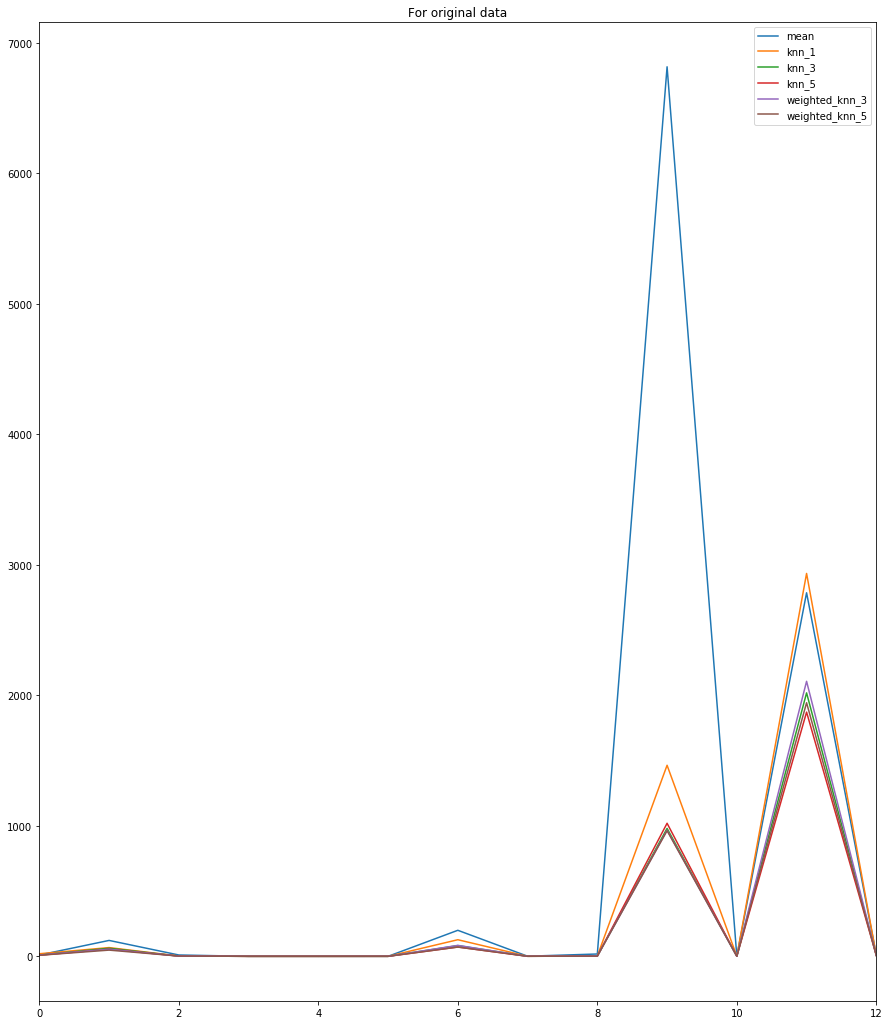

In [73]:
result_mse.plot.line(figsize=(15,18))
plt.title('For original data')

### Sorted MSE values for original data

In [74]:
result_mse.sum(axis = 0, skipna = True).sort_values(ascending=True)

knn_5             3036.718896
weighted_knn_5    3043.231130
knn_3             3163.782291
weighted_knn_3    3232.729796
knn_1             4624.794404
mean              9972.425534
dtype: float64

In [75]:
# creating dataframe for mse for better represtation
columns_=['mean','knn_1','knn_3','knn_5','weighted_knn_3','weighted_knn_5']
result_mse_scal=pd.DataFrame([mean_scal_mse,KNN_1_scal_mse,KNN_3_scal_mse,KNN_5_scal_mse,wKNN_3_scal_mse,wKNN_5_scal_mse])
result_mse_scal=(pd.DataFrame(result_mse_scal.T))
result_mse_scal.columns=columns_

In [76]:
result_mse_scal

,mean,knn_1,knn_3,knn_5,weighted_knn_3,weighted_knn_5
0,0.001524,0.002459,0.000750,0.000597,0.000861,0.000563
1,0.007505,0.004144,0.002347,0.002587,0.002122,0.002117
2,0.013919,0.002200,0.002733,0.002802,0.002177,0.002300
3,0.016381,0.021739,0.016469,0.014783,0.015849,0.014579
4,0.014358,0.005000,0.003850,0.004105,0.003765,0.003737
5,0.004110,0.003570,0.003120,0.003169,0.002950,0.002910
6,0.021242,0.012155,0.008937,0.007787,0.009054,0.007744
7,0.010577,0.002711,0.002711,0.002598,0.002585,0.002355
8,0.040760,0.003486,0.003437,0.004176,0.003130,0.003685
9,0.027702,0.002308,0.002454,0.002426,0.002062,0.001910


In [80]:
result_mse_scal.to_csv('results_scaled_data.csv')

Text(0.5, 1.0, 'For original data')

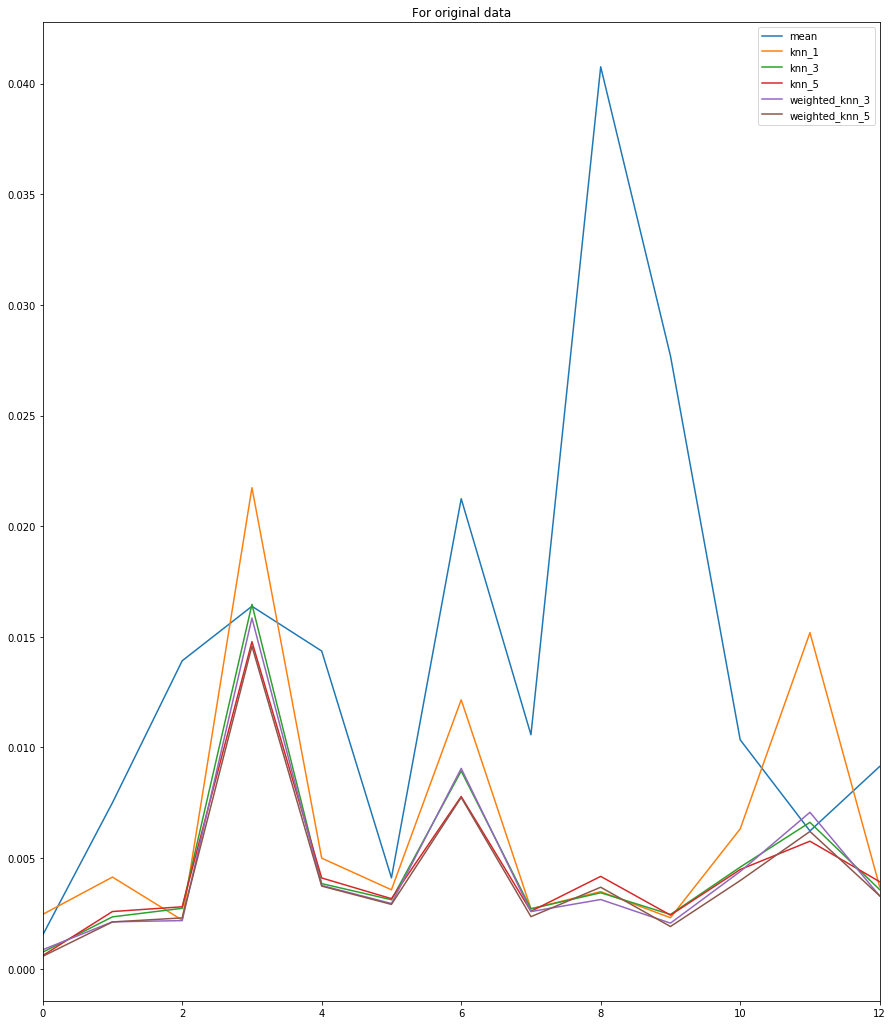

In [77]:

result_mse_scal.plot.line(figsize=(15,18))
plt.title('For original data')

### Sorted MSE values for scaled data

In [79]:
result_mse_scal.sum(axis = 0, skipna = True).sort_values(ascending=True)

weighted_knn_5    0.055390
knn_5             0.059213
weighted_knn_3    0.059316
knn_3             0.061596
knn_1             0.084985
mean              0.183797
dtype: float64

# Observation 

1.Based on above result weighted_knn_5 has outperformed because it has Least MSE followed by KNN_5.Both results are constant across scaled and original data.The lower the mse the better is the model.
 
2.For scaled data almost knn and weighted knn performed similarly which can be observed from mse values.
 